columns_meaning.csv: this file will help you to understand your data

sample_submission.csv: your submission should be something like this, same columns, same shape, same id, differents days 💪

train_set.csv: this is the bit you'll work with in order to get the best model

test_set.csv: use it ONLY to make the prediction

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# la otra forma, pero lo mismo: from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,8)
# Load libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# progress bar 
from tqdm import tqdm


In [7]:
df = pd.read_csv('/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/ProjectsDS/how-long-would-you-stay/train_set.csv')

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


In [9]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [11]:
df.isnull().values.any()

True

In [12]:
df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9       33
10       0
11    1483
12       0
13       0
14       0
15       0
16       0
17       0
dtype: int64

In [13]:
df2 = df.fillna(0)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,237869,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,254763,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,69788,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,204442,32,f,9,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


In [14]:
df2.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df2.drop("0",1,inplace = True)

In [16]:
df2.drop(['1','3'], 1, inplace = True)

In [17]:
df2

,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,a,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,a,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,c,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,f,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,a,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,b,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,a,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,f,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2       100000 non-null  object 
 1   4       100000 non-null  object 
 2   5       100000 non-null  int64  
 3   6       100000 non-null  object 
 4   7       100000 non-null  object 
 5   8       100000 non-null  object 
 6   9       100000 non-null  float64
 7   10      100000 non-null  int64  
 8   11      100000 non-null  float64
 9   12      100000 non-null  object 
 10  13      100000 non-null  object 
 11  14      100000 non-null  int64  
 12  15      100000 non-null  object 
 13  16      100000 non-null  float64
 14  17      100000 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 11.4+ MB


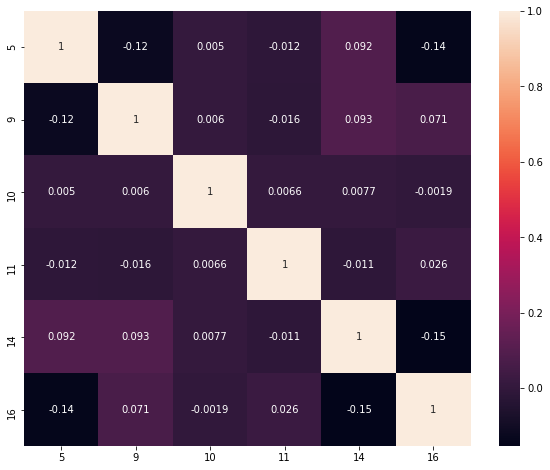

In [19]:
corrMatrix = df2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [20]:
le = LabelEncoder()
# Converting string labels into numbers.
df2[['2']] = le.fit_transform(df2[['2']])
# Sunny: 2, Overcast: 0, Rainy:1
print(df2['2'])

0        0
1        0
2        2
3        5
4        0
        ..
99995    0
99996    1
99997    0
99998    5
99999    4
Name: 2, Length: 100000, dtype: int64


In [21]:
le = LabelEncoder()
# Converting string labels into numbers.
df2[['4']] = le.fit_transform(df2[['4']])
print(df2['4'])

0        0
1        0
2        2
3        1
4        0
        ..
99995    1
99996    0
99997    0
99998    1
99999    0
Name: 4, Length: 100000, dtype: int64


In [22]:
le = LabelEncoder()
df2['6'] = le.fit_transform(df2['6'])
print(df2['6'])

0        2
1        2
2        1
3        2
4        2
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: 6, Length: 100000, dtype: int64


In [23]:
le = LabelEncoder()
df2['7'] = le.fit_transform(df2['7'])
print(df2['7'])

0        2
1        1
2        3
3        3
4        3
        ..
99995    2
99996    2
99997    1
99998    3
99999    1
Name: 7, Length: 100000, dtype: int64


In [24]:
le = LabelEncoder()
df2['8'] = le.fit_transform(df2['8'])
print(df2['8'])

0        5
1        5
2        5
3        1
4        4
        ..
99995    1
99996    5
99997    5
99998    1
99999    4
Name: 8, Length: 100000, dtype: int64


In [25]:
le = LabelEncoder()
df2['12'] = le.fit_transform(df2['12'])
print(df2['12'])

0        2
1        1
2        2
3        0
4        2
        ..
99995    0
99996    2
99997    1
99998    1
99999    0
Name: 12, Length: 100000, dtype: int64


In [26]:
le = LabelEncoder()
df2['13'] = le.fit_transform(df2['13'])
print(df2['13'])

0        2
1        2
2        2
3        2
4        2
        ..
99995    2
99996    2
99997    1
99998    2
99999    2
Name: 13, Length: 100000, dtype: int64


In [27]:
le = LabelEncoder()
df2['15'] = le.fit_transform(df2['15'])
print(df2['15'])

0        2
1        5
2        7
3        1
4        5
        ..
99995    5
99996    2
99997    3
99998    4
99999    4
Name: 15, Length: 100000, dtype: int64


In [28]:
le_17 = LabelEncoder()
df2['17'] = le_17.fit_transform(df2['17'])
print(df2['17'])

0         0
1         2
2         1
3         5
4         5
         ..
99995    10
99996     5
99997     3
99998     1
99999     4
Name: 17, Length: 100000, dtype: int64


In [29]:
df2

,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,2,2,2,5,4.0,45810,2.0,2,2,2,2,2817.0,0
1,0,0,4,2,1,5,2.0,128565,15.0,1,2,4,5,4498.0,2
2,2,2,2,1,3,5,3.0,46565,5.0,2,2,2,7,4573.0,1
3,5,1,3,2,3,1,4.0,124546,6.0,0,2,4,1,7202.0,5
4,0,0,3,2,3,4,2.0,22729,8.0,2,2,2,5,3398.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,3,2,2,1,3.0,82914,3.0,0,2,6,5,3966.0,10
99996,1,0,2,2,2,5,2.0,40026,5.0,2,2,3,2,4005.0,5
99997,0,0,3,2,1,5,3.0,92346,2.0,1,1,2,3,5215.0,3
99998,5,1,2,2,3,1,4.0,113798,15.0,1,2,3,4,5092.0,1


In [ ]:
# ten cuidado que df2 no tiene los valores codificados con LabelEncoder
df2

,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,a,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,a,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,c,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,f,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,a,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,b,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,a,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,f,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


Definir X e y

In [32]:
def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)

In [33]:
df2 = clean_dataset(df)
df2

ValueError: could not convert string to float: 'a'

In [34]:
X = np.array(df2.iloc[:,0:-1])
y = np.array(df2['17'])
X.shape

(100000, 14)

In [35]:
y.shape

(100000,)

The goal of this competition is the prediction of the days a patient would stay in the hospital given some characteristics, putting into practice all the machine learning techniques you've learn.

The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [36]:
df2.isnull().values.any()

False

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
model = linear_model.LogisticRegression()

In [39]:
df2.isnull().sum()

2     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [49]:
df2.shape

(100000, 15)

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
predictions = model.predict(X_test)
print(predictions)

[2 2 2 ... 2 2 2]


In [47]:
# ocurre este error IndexError: arrays used as indices must be of integer (or boolean) type
# porque la predicción: "predictions" son float, por lo que primero de todo habrá que pasar ese array a integer
predictions = predictions.astype(int)

In [48]:
predictions.shape

(20000,)

In [50]:
prediction_test = le.inverse_transform(predictions)

In [51]:
prediction_test

array(['21-30', '21-30', '21-30', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [52]:
model.score(X_test,y_test)

0.2728

In [ ]:
# no entiendo qué hace esto
print(df.shape)
index = 0
for i in df[['2','4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17']]:
    if i == 'float64':
        print(index, i)
    index +=1

(98484, 18)


In [ ]:
index

15

Predict

In [95]:
to_pred = pd.read_csv('/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/ProjectsDS/how-long-would-you-stay/test_set.csv')
to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [105]:
to_pred = to_pred.fillna(0)

In [106]:
to_pred.shape

(133744, 17)

In [107]:
to_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133744 entries, 0 to 133743
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       133744 non-null  int64  
 1   1       133744 non-null  int64  
 2   2       133744 non-null  int64  
 3   3       133744 non-null  int64  
 4   4       133744 non-null  int64  
 5   5       133744 non-null  int64  
 6   6       133744 non-null  int64  
 7   7       133744 non-null  int64  
 8   8       133744 non-null  int64  
 9   9       133744 non-null  float64
 10  10      133744 non-null  int64  
 11  11      133744 non-null  float64
 12  12      133744 non-null  int64  
 13  13      133744 non-null  int64  
 14  14      133744 non-null  int64  
 15  15      133744 non-null  int64  
 16  16      133744 non-null  float64
dtypes: float64(3), int64(14)
memory usage: 17.3 MB


In [ ]:
'''
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
to_pred[['2']] = le.fit_transform(to_pred[['2']])
# Sunny: 2, Overcast: 0, Rainy:1
print(to_pred['2'])
'''

"\nle = preprocessing.LabelEncoder()\n# Converting string labels into numbers.\nto_pred[['2']] = le.fit_transform(to_pred[['2']])\n# Sunny: 2, Overcast: 0, Rainy:1\nprint(to_pred['2'])\n"

In [97]:
for i in to_pred[['2','4','6', '7', '8', '12','13', '15']]:
    le = LabelEncoder()
    to_pred[i] = le.fit_transform(to_pred[i])

In [80]:
to_pred

,2,4,5,6,7,8,9,10,11,12,13,14,15,16
1,2,2,3,2,3,5,2.0,102253,15.0,1,2,3,3,5734.0
2,4,0,4,2,2,4,4.0,5828,4.0,0,1,3,7,5064.0
3,2,2,4,0,2,0,2.0,56642,9.0,2,0,4,3,3254.0
4,0,0,4,2,2,5,1.0,116266,8.0,0,1,3,2,4639.0
5,2,2,4,2,1,5,3.0,25016,9.0,2,2,2,3,4913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,3,1,6,1,1,1,3.0,123269,25.0,2,1,4,5,5089.0
133740,0,1,2,2,3,2,2.0,1293,8.0,0,2,3,6,6713.0
133741,2,2,3,2,2,0,3.0,112921,5.0,1,1,3,3,5326.0
133742,1,0,4,2,2,5,2.0,585,2.0,1,0,2,3,7072.0


In [108]:
to_pred1 = to_pred.iloc[0:,0:]
to_pred1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,0,7,1,4,2,3,2,2.0,59278,8.0,0,1,2,4,4778.0
1,208989,15,2,5,2,3,2,3,5,2.0,102253,15.0,1,2,3,3,5734.0
2,305872,17,4,1,0,4,2,2,4,4.0,5828,4.0,0,1,3,7,5064.0
3,266099,3,2,3,2,4,0,2,0,2.0,56642,9.0,2,0,4,3,3254.0
4,13228,6,0,6,0,4,2,2,5,1.0,116266,8.0,0,1,3,2,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,3,13,1,6,1,1,1,3.0,123269,25.0,2,1,4,5,5089.0
133740,144850,27,0,7,1,2,2,3,2,2.0,1293,8.0,0,2,3,6,6713.0
133741,180676,16,2,3,2,3,2,2,0,3.0,112921,5.0,1,1,3,3,5326.0
133742,39933,28,1,11,0,4,2,2,5,2.0,585,2.0,1,0,2,3,7072.0


In [109]:
to_pred1.drop(['0','1','3'], 1, inplace=True)

In [110]:
to_pred1.shape

(133744, 14)

In [111]:
to_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133744 entries, 0 to 133743
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2       133744 non-null  int64  
 1   4       133744 non-null  int64  
 2   5       133744 non-null  int64  
 3   6       133744 non-null  int64  
 4   7       133744 non-null  int64  
 5   8       133744 non-null  int64  
 6   9       133744 non-null  float64
 7   10      133744 non-null  int64  
 8   11      133744 non-null  float64
 9   12      133744 non-null  int64  
 10  13      133744 non-null  int64  
 11  14      133744 non-null  int64  
 12  15      133744 non-null  int64  
 13  16      133744 non-null  float64
dtypes: float64(3), int64(11)
memory usage: 14.3 MB


In [112]:
to_pred1[['9','11','16']].astype(int)

,9,11,16
0,2,8,4778
1,2,15,5734
2,4,4,5064
3,2,9,3254
4,1,8,4639
...,...,...,...
133739,3,25,5089
133740,2,8,6713
133741,3,5,5326
133742,2,2,7072


In [115]:
predict_to_pred = model.predict(to_pred1)
predict_to_pred

array([2, 2, 2, ..., 2, 2, 2])

In [116]:
submission = le.inverse_transform(predict_to_pred.astype(int))
submission

array(['21-30', '21-30', '21-30', ..., '21-30', '21-30', '21-30'],
      dtype=object)

In [ ]:
#list(le.classes_)

In [ ]:
'''
le.transform(['0-10',
 '11-20',
 '21-30',
 '31-40',
 '41-50',
 '51-60',
 '61-70',
 '71-80',
 '81-90',
 '91-100'])
'''

"\nle.transform(['0-10',\n '11-20',\n '21-30',\n '31-40',\n '41-50',\n '51-60',\n '61-70',\n '71-80',\n '81-90',\n '91-100'])\n"

In [ ]:
#list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [119]:
predictions_submit = model.predict(to_pred1)
predictions_submit

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
#predictions_submit.shape

In [ ]:
'''
for i in predictions_submit[['4','6', '7', '8', '12',
       '13', '15']]:
    le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
    predictions_submit[i] = le.inverse_transform(predictions_submit[i])
# Sunny: 2, Overcast: 0, Rainy:1
    print(predictions_submit[i])
'''

"\nfor i in predictions_submit[['4','6', '7', '8', '12',\n       '13', '15']]:\n    le = preprocessing.LabelEncoder()\n# Converting string labels into numbers.\n    predictions_submit[i] = le.inverse_transform(predictions_submit[i])\n# Sunny: 2, Overcast: 0, Rainy:1\n    print(predictions_submit[i])\n"

In [120]:
predictions_submit.shape

(133744,)

In [89]:
predictions_submit.reshape(-1,1)

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [121]:
submission = pd.DataFrame({"id": to_pred["0"], "days": submission})
submission

,id,days
0,314114,21-30
1,208989,21-30
2,305872,21-30
3,266099,21-30
4,13228,21-30
...,...,...
133739,318155,21-30
133740,144850,21-30
133741,180676,21-30
133742,39933,21-30


In [123]:
submission.shape

(133744, 2)

In [124]:
sample = pd.read_csv('/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/ProjectsDS/how-long-would-you-stay/sample_submission.csv')

In [125]:
sample.shape

(133744, 2)

In [126]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit.csv", index = False)

you're ready to submit!
